In [1]:
import tensorflow
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
train_data = image.ImageDataGenerator(rescale = 1./255,
                                    featurewise_center=True, 
                                    samplewise_center=True, 
                                    featurewise_std_normalization=True, 
                                    samplewise_std_normalization=True, 
                                    zca_whitening=False, zca_epsilon=1e-06, 
                                    rotation_range=40, width_shift_range=0.0,
                                    height_shift_range=0.0, brightness_range=(0.2, 0.2),
                                    shear_range=0.2, zoom_range=0.2, 
                                    channel_shift_range=0.0, fill_mode='nearest', 
                                    cval=0.0, horizontal_flip=True, vertical_flip=True,
                                    data_format=None, validation_split=0.0, dtype=None)
test_data = image.ImageDataGenerator(rescale = 1./255,
                                    featurewise_center=True, 
                                    samplewise_center=True, 
                                    featurewise_std_normalization=True, 
                                    samplewise_std_normalization=True, 
                                    zca_whitening=False, zca_epsilon=1e-06, 
                                    rotation_range=40, width_shift_range=0.0,
                                    height_shift_range=0.0, brightness_range=(0.2, 0.2),
                                    shear_range=0.2, zoom_range=0.2, 
                                    channel_shift_range=0.0, fill_mode='nearest', 
                                    cval=0.0, horizontal_flip=True, vertical_flip=True,
                                    data_format=None, validation_split=0.0, dtype=None)

In [3]:
test = train_data.flow_from_directory(r"C:\Users\SUPERMAN\Desktop\hand\image_Sep\test\\",
                                     target_size=(48, 48), classes = [str(x) for x in range(100)],
                                     class_mode='categorical', batch_size=64, seed=1)
train = test_data.flow_from_directory(r"C:\Users\SUPERMAN\Desktop\hand\image_Sep\train\\",
                                     target_size=(48, 48), classes = [str(x) for x in range(100)],
                                     class_mode='categorical',batch_size=64,seed=1)

Found 1000 images belonging to 100 classes.
Found 9000 images belonging to 100 classes.


In [4]:
def model_creation():
    
    model = Sequential()
    model.add(Conv2D(8, kernel_size=(2, 2), input_shape=(48, 48, 3)))
    model.add(Conv2D(16,kernel_size=(2, 2), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu'))
    #model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(100, activation='softmax'))
    
    return model

model = model_creation()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 47, 47, 8)         104       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 16)        528       
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        2080      
_________________________________________________________________
flatten (Flatten)            (None, 64800)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              66356224  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0

In [5]:
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit_generator(train, steps_per_epoch=100,
                    epochs=500, validation_data=test,
                    validation_steps=30, verbose=2)

Epoch 1/500
100/100 - 34s - loss: 2.5000 - accuracy: 0.1354 - val_loss: 2.2876 - val_accuracy: 0.1688
Epoch 2/500
100/100 - 31s - loss: 2.2383 - accuracy: 0.1655 - val_loss: 2.1961 - val_accuracy: 0.1994
Epoch 3/500
100/100 - 31s - loss: 2.1722 - accuracy: 0.1893 - val_loss: 2.1584 - val_accuracy: 0.2242
Epoch 4/500
100/100 - 31s - loss: 2.1344 - accuracy: 0.2022 - val_loss: 2.1067 - val_accuracy: 0.2563
Epoch 5/500
100/100 - 31s - loss: 2.1054 - accuracy: 0.2167 - val_loss: 2.0776 - val_accuracy: 0.2458
Epoch 6/500
100/100 - 32s - loss: 2.0780 - accuracy: 0.2299 - val_loss: 2.0441 - val_accuracy: 0.2553
Epoch 7/500
100/100 - 32s - loss: 2.0552 - accuracy: 0.2412 - val_loss: 2.0363 - val_accuracy: 0.2695
Epoch 8/500
100/100 - 31s - loss: 2.0341 - accuracy: 0.2492 - val_loss: 2.0195 - val_accuracy: 0.2653
Epoch 9/500
100/100 - 31s - loss: 2.0280 - accuracy: 0.2524 - val_loss: 1.9720 - val_accuracy: 0.2827
Epoch 10/500
100/100 - 31s - loss: 2.0082 - accuracy: 0.2586 - val_loss: 1.9767 - 

Epoch 81/500
100/100 - 31s - loss: 1.4683 - accuracy: 0.4888 - val_loss: 1.4857 - val_accuracy: 0.4789
Epoch 82/500
100/100 - 31s - loss: 1.4491 - accuracy: 0.4977 - val_loss: 1.4859 - val_accuracy: 0.4947
Epoch 83/500
100/100 - 31s - loss: 1.4516 - accuracy: 0.4947 - val_loss: 1.5017 - val_accuracy: 0.4905
Epoch 84/500
100/100 - 31s - loss: 1.4409 - accuracy: 0.4991 - val_loss: 1.4828 - val_accuracy: 0.5037
Epoch 85/500
100/100 - 31s - loss: 1.4482 - accuracy: 0.4891 - val_loss: 1.4978 - val_accuracy: 0.4810
Epoch 86/500
100/100 - 31s - loss: 1.4456 - accuracy: 0.4909 - val_loss: 1.4871 - val_accuracy: 0.5069
Epoch 87/500
100/100 - 31s - loss: 1.4310 - accuracy: 0.4947 - val_loss: 1.4954 - val_accuracy: 0.4968
Epoch 88/500
100/100 - 31s - loss: 1.4092 - accuracy: 0.5099 - val_loss: 1.4701 - val_accuracy: 0.5074
Epoch 89/500
100/100 - 31s - loss: 1.4397 - accuracy: 0.4919 - val_loss: 1.4713 - val_accuracy: 0.4931
Epoch 90/500
100/100 - 31s - loss: 1.3935 - accuracy: 0.5063 - val_loss: 

Epoch 160/500
100/100 - 31s - loss: 1.1679 - accuracy: 0.5988 - val_loss: 1.3731 - val_accuracy: 0.5485
Epoch 161/500
100/100 - 31s - loss: 1.1570 - accuracy: 0.5994 - val_loss: 1.3635 - val_accuracy: 0.5517
Epoch 162/500
100/100 - 31s - loss: 1.1396 - accuracy: 0.5994 - val_loss: 1.4149 - val_accuracy: 0.5491
Epoch 163/500
100/100 - 31s - loss: 1.1483 - accuracy: 0.6090 - val_loss: 1.4140 - val_accuracy: 0.5506
Epoch 164/500
100/100 - 31s - loss: 1.1382 - accuracy: 0.6018 - val_loss: 1.3811 - val_accuracy: 0.5517
Epoch 165/500
100/100 - 32s - loss: 1.1620 - accuracy: 0.5958 - val_loss: 1.3541 - val_accuracy: 0.5622
Epoch 166/500
100/100 - 31s - loss: 1.1364 - accuracy: 0.6107 - val_loss: 1.3571 - val_accuracy: 0.5570
Epoch 167/500
100/100 - 31s - loss: 1.1232 - accuracy: 0.6070 - val_loss: 1.3262 - val_accuracy: 0.5665
Epoch 168/500
100/100 - 31s - loss: 1.1363 - accuracy: 0.5997 - val_loss: 1.3656 - val_accuracy: 0.5686
Epoch 169/500
100/100 - 31s - loss: 1.1302 - accuracy: 0.6076 - 

Epoch 239/500
100/100 - 31s - loss: 0.9459 - accuracy: 0.6731 - val_loss: 1.3545 - val_accuracy: 0.5870
Epoch 240/500
100/100 - 31s - loss: 0.9423 - accuracy: 0.6683 - val_loss: 1.3422 - val_accuracy: 0.5986
Epoch 241/500
100/100 - 31s - loss: 0.9448 - accuracy: 0.6823 - val_loss: 1.3503 - val_accuracy: 0.5934
Epoch 242/500
100/100 - 31s - loss: 0.9395 - accuracy: 0.6675 - val_loss: 1.3947 - val_accuracy: 0.5997
Epoch 243/500
100/100 - 31s - loss: 0.9532 - accuracy: 0.6696 - val_loss: 1.3238 - val_accuracy: 0.6002
Epoch 244/500
100/100 - 32s - loss: 0.9460 - accuracy: 0.6747 - val_loss: 1.3523 - val_accuracy: 0.5918
Epoch 245/500
100/100 - 31s - loss: 0.9359 - accuracy: 0.6742 - val_loss: 1.3550 - val_accuracy: 0.5960
Epoch 246/500
100/100 - 31s - loss: 0.9401 - accuracy: 0.6700 - val_loss: 1.4175 - val_accuracy: 0.5807
Epoch 247/500
100/100 - 31s - loss: 0.9319 - accuracy: 0.6781 - val_loss: 1.3649 - val_accuracy: 0.5923
Epoch 248/500
100/100 - 31s - loss: 0.9368 - accuracy: 0.6760 - 

Epoch 318/500
100/100 - 31s - loss: 0.7903 - accuracy: 0.7304 - val_loss: 1.4181 - val_accuracy: 0.5854
Epoch 319/500
100/100 - 31s - loss: 0.8155 - accuracy: 0.7136 - val_loss: 1.4091 - val_accuracy: 0.5912
Epoch 320/500
100/100 - 31s - loss: 0.7827 - accuracy: 0.7288 - val_loss: 1.4151 - val_accuracy: 0.6007
Epoch 321/500
100/100 - 31s - loss: 0.8022 - accuracy: 0.7199 - val_loss: 1.3700 - val_accuracy: 0.6055
Epoch 322/500
100/100 - 31s - loss: 0.7888 - accuracy: 0.7259 - val_loss: 1.4065 - val_accuracy: 0.6050
Epoch 323/500
100/100 - 31s - loss: 0.7993 - accuracy: 0.7280 - val_loss: 1.3880 - val_accuracy: 0.5902
Epoch 324/500
100/100 - 31s - loss: 0.7727 - accuracy: 0.7320 - val_loss: 1.3972 - val_accuracy: 0.5897
Epoch 325/500
100/100 - 31s - loss: 0.8040 - accuracy: 0.7164 - val_loss: 1.3708 - val_accuracy: 0.5970
Epoch 326/500
100/100 - 31s - loss: 0.7921 - accuracy: 0.7332 - val_loss: 1.3760 - val_accuracy: 0.5918
Epoch 327/500
100/100 - 31s - loss: 0.7822 - accuracy: 0.7302 - 

Epoch 397/500
100/100 - 31s - loss: 0.6743 - accuracy: 0.7610 - val_loss: 1.4555 - val_accuracy: 0.6065
Epoch 398/500
100/100 - 31s - loss: 0.7026 - accuracy: 0.7530 - val_loss: 1.4255 - val_accuracy: 0.6134
Epoch 399/500
100/100 - 31s - loss: 0.6929 - accuracy: 0.7616 - val_loss: 1.4891 - val_accuracy: 0.6071
Epoch 400/500
100/100 - 31s - loss: 0.6682 - accuracy: 0.7690 - val_loss: 1.4968 - val_accuracy: 0.6065
Epoch 401/500
100/100 - 31s - loss: 0.6585 - accuracy: 0.7705 - val_loss: 1.5468 - val_accuracy: 0.5960
Epoch 402/500
100/100 - 31s - loss: 0.6747 - accuracy: 0.7689 - val_loss: 1.5468 - val_accuracy: 0.5992
Epoch 403/500
100/100 - 31s - loss: 0.6640 - accuracy: 0.7680 - val_loss: 1.5551 - val_accuracy: 0.5923
Epoch 404/500
100/100 - 31s - loss: 0.6776 - accuracy: 0.7673 - val_loss: 1.4678 - val_accuracy: 0.6023
Epoch 405/500
100/100 - 31s - loss: 0.6616 - accuracy: 0.7688 - val_loss: 1.4375 - val_accuracy: 0.6092
Epoch 406/500
100/100 - 31s - loss: 0.6738 - accuracy: 0.7636 - 

Epoch 476/500
100/100 - 31s - loss: 0.5802 - accuracy: 0.7974 - val_loss: 1.5925 - val_accuracy: 0.5955
Epoch 477/500
100/100 - 31s - loss: 0.5918 - accuracy: 0.7963 - val_loss: 1.4971 - val_accuracy: 0.6229
Epoch 478/500
100/100 - 32s - loss: 0.5896 - accuracy: 0.8014 - val_loss: 1.5241 - val_accuracy: 0.6002
Epoch 479/500
100/100 - 31s - loss: 0.5952 - accuracy: 0.7947 - val_loss: 1.5041 - val_accuracy: 0.6176
Epoch 480/500
100/100 - 31s - loss: 0.5847 - accuracy: 0.8003 - val_loss: 1.5099 - val_accuracy: 0.6171
Epoch 481/500
100/100 - 31s - loss: 0.5865 - accuracy: 0.7961 - val_loss: 1.5257 - val_accuracy: 0.6271
Epoch 482/500
100/100 - 31s - loss: 0.5962 - accuracy: 0.7950 - val_loss: 1.5439 - val_accuracy: 0.6071
Epoch 483/500
100/100 - 31s - loss: 0.5752 - accuracy: 0.7989 - val_loss: 1.5364 - val_accuracy: 0.6108
Epoch 484/500
100/100 - 31s - loss: 0.5997 - accuracy: 0.7945 - val_loss: 1.5233 - val_accuracy: 0.6123
Epoch 485/500
100/100 - 31s - loss: 0.5920 - accuracy: 0.7917 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


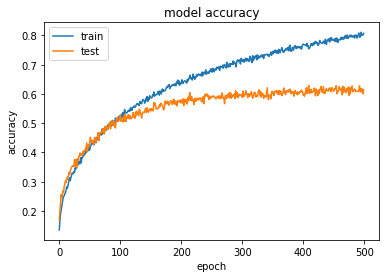

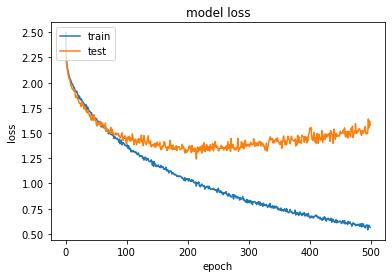

In [10]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
#Evaluating Model
score  = model.evaluate_generator(test,steps = 100)
#printAccuracy
print("Accuracyloss:-", score[0])
print("AccuracyScore",score[1] )

Accuracyloss:- 1.5648038399219513
AccuracyScore 0.6123721


In [9]:
import os
model.save(os.getcwd()+"//"+"weights.h5")

In [12]:
Y_pred = model.predict_generator(test, 1000 //64+1)
print(Y_pred)

[[4.42189375e-05 4.35559574e-04 8.25470721e-04 ... 1.77790387e-11
  4.07763190e-12 4.57721569e-11]
 [5.97715766e-11 2.02534422e-01 3.08023363e-01 ... 1.31420116e-13
  4.83882953e-13 1.01428978e-12]
 [1.29806596e-10 7.98350811e-01 2.49329046e-03 ... 2.79841345e-10
  6.13287310e-10 4.35249253e-10]
 ...
 [3.79787780e-05 3.73479635e-01 1.02772541e-01 ... 5.55534257e-07
  8.11064979e-07 1.86680495e-06]
 [4.41874483e-13 1.09030188e-10 9.17280401e-12 ... 1.07085775e-19
  2.37035222e-19 1.01254541e-20]
 [1.40049934e-07 6.45761087e-04 6.62255508e-04 ... 1.96033120e-11
  3.89480809e-11 1.35589720e-10]]


In [33]:
import numpy as np
y_pred = np.argmax(Y_pred, axis=1)

#len(y_pred)

print("Validation ", test.classes)

Validation  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Confusion Matrix


Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)


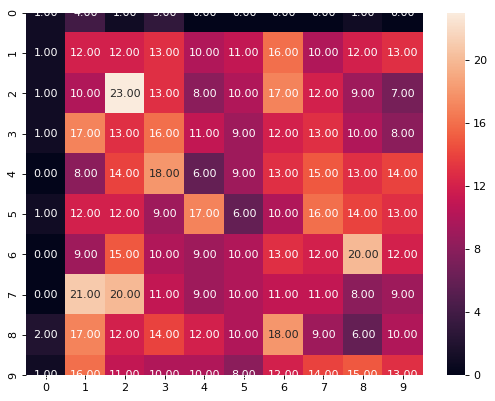

In [44]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

print('Confusion Matrix')
print(sns.heatmap(confusion_matrix(test.classes, y_pred), fmt='.2f', annot=True))

In [45]:
print('Classification Report')
target_names = [str(x) for x in range(10)]
print(classification_report(test.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

           0       0.12      0.10      0.11        10
           1       0.10      0.11      0.10       110
           2       0.17      0.21      0.19       110
           3       0.14      0.15      0.14       110
           4       0.07      0.05      0.06       110
           5       0.07      0.05      0.06       110
           6       0.11      0.12      0.11       110
           7       0.10      0.10      0.10       110
           8       0.06      0.05      0.06       110
           9       0.13      0.12      0.12       110

    accuracy                           0.11      1000
   macro avg       0.11      0.11      0.11      1000
weighted avg       0.10      0.11      0.10      1000



In [94]:
import cv2
image = cv2.imread("002_201.jpg")
image = cv2.resize(image, (48, 48), interpolation = cv2.INTER_AREA)
data_batch = np.asarray(image).reshape((-1, 48, 48, 3)).astype(float)
print("Image reshape :-", data_batch.shape)
###model.predict(np.expand_dims(data_batch, axis=0))
test_image = model.predict(data_batch)
test_image[0].shape

Image reshape :- (1, 48, 48, 3)


(100,)

In [95]:
print("Test image Probabilites...........")
print(test_image)

Test image Probabilites...........
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


In [87]:
test_image = test_image.argmax(axis=-1)
test_image

0